In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import cv2
from PIL import Image 
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout

import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix
from keras.utils.vis_utils import plot_model

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img,img_to_array

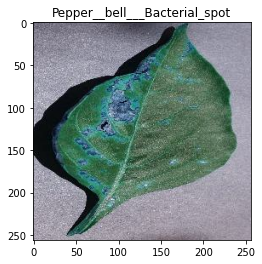

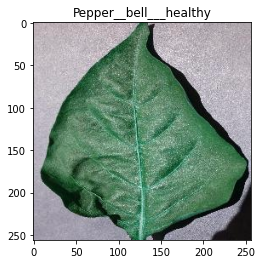

TypeError: Image data of dtype object cannot be converted to float

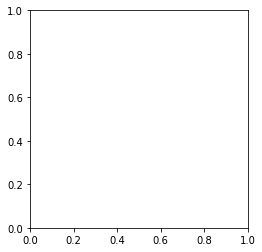

In [ ]:
DATA_PATH = "PlantVillage/"

for cat in os.listdir(DATA_PATH):
    path = os.path.join(DATA_PATH, cat)
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
        plt.imshow(image)
        plt.title(f'{cat}')
        plt.show()
        break

In [ ]:
img_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=0.2, horizontal_flip=True, vertical_flip=True,
                                 shear_range=0.2, validation_split=0.25)

train_data_gen = img_data_gen.flow_from_directory(DATA_PATH, batch_size=360, subset='training', 
                                                  class_mode='categorical', shuffle=True) 

val_data_gen = img_data_gen.flow_from_directory(DATA_PATH, batch_size=360, subset='validation', 
                                                  class_mode='categorical', shuffle=True) 

Found 30961 images belonging to 16 classes.
Found 10315 images belonging to 16 classes.


In [ ]:
IMAGE_SIZE = [224, 224]

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False


87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

prediction = Dense(38, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

In [ ]:

class_map = train_data_gen.class_indices
class_map

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:

Model = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(train_data_gen),
  validation_steps=len(val_data_gen)
)

Epoch 1/25
42/42 [==============================] - 189s 4s/step - loss: 2.2195 - accuracy: 0.4242 - val_loss: 1.1971 - val_accuracy: 0.6883
Epoch 2/25
42/42 [==============================] - 167s 4s/step - loss: 1.1718 - accuracy: 0.6702 - val_loss: 0.7902 - val_accuracy: 0.7889
Epoch 3/25
42/42 [==============================] - 166s 4s/step - loss: 0.8912 - accuracy: 0.7435 - val_loss: 0.6366 - val_accuracy: 0.8273
Epoch 4/25
42/42 [==============================] - 165s 4s/step - loss: 0.7426 - accuracy: 0.7796 - val_loss: 0.5419 - val_accuracy: 0.8427
Epoch 5/25
42/42 [==============================] - 166s 4s/step - loss: 0.6545 - accuracy: 0.8055 - val_loss: 0.4889 - val_accuracy: 0.8631
Epoch 6/25
42/42 [==============================] - 163s 4s/step - loss: 0.5821 - accuracy: 0.8226 - val_loss: 0.4430 - val_accuracy: 0.8687
Epoch 7/25
42/42 [==============================] - 163s 4s/step - loss: 0.5401 - accuracy: 0.8382 - val_loss: 0.4193 - val_accuracy: 0.8690
Epoch 8/25
42

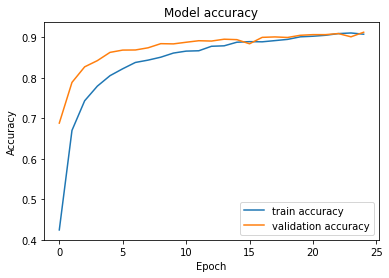

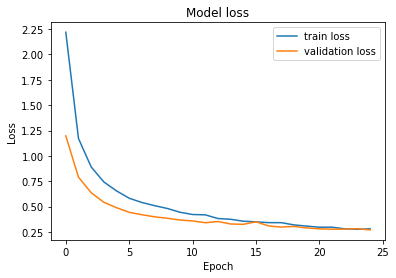

In [ ]:
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_Xception')
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_Xception')
    plt.show()
    
plot_accuracy(Model)
plot_loss(Model)

In [ ]:
score = model.evaluate_generator(val_data_gen)
print('Test loss:', score[0])
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Test loss: 0.269523561000824

accuracy: 91.29%


In [ ]:
category={
    0:'Apple___Apple_scab',
 1:'Apple___Black_rot',
 2:'Apple___Cedar_apple_rust',
 3:'Apple___healthy',
 4:'Blueberry___healthy',
 5:'Cherry_(including_sour)___Powdery_mildew',
 6:'Cherry_(including_sour)___healthy',
 7:'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8:'Corn_(maize)___Common_rust_',
 9:'Corn_(maize)___Northern_Leaf_Blight',
 10:'Corn_(maize)___healthy',
 11:'Grape___Black_rot',
 12:'Grape___Esca_(Black_Measles)',
 13:'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14:'Grape___healthy',
 15:'Orange___Haunglongbing_(Citrus_greening)',
 16:'Peach___Bacterial_spot',
 17:'Peach___healthy',
 18:'Pepper,_bell___Bacterial_spot',
 19:'Pepper,_bell___healthy',
 20:'Potato___Early_blight',
 21:'Potato___Late_blight',
 22:'Potato___healthy',
 23:'Raspberry___healthy',
 24:'Soybean___healthy',
 25:'Squash___Powdery_mildew',
 26:'Strawberry___Leaf_scorch',
 27:'Strawberry___healthy',
 28:'Tomato___Bacterial_spot',
 29:'Tomato___Early_blight',
 30:'Tomato___Late_blight',
 31:'Tomato___Leaf_Mold',
 32:'Tomato___Septoria_leaf_spot',
 33:'Tomato___Spider_mites Two-spotted_spider_mite',
 34:'Tomato___Target_Spot',
 35:'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 36:'Tomato___Tomato_mosaic_virus',
 37:'Tomato___healthy'
}

def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 255.   
    
    prediction = model.predict(img_processed)
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(category[index]))
    plt.imshow(img_array)
    
def predict_dir(filedir,model):
    cols=3
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    
    true=filedir.split('/')[-1]
    
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
        
    for subplot, imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(224, 224))
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0) 
        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
        
        pred=category.get(index)
        if pred==true:
            pos+=1

    acc=pos/total_images
    print("Accuracy for {orignal}: {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images,orignal=true))

1/1 [==============================] - 0s 23ms/step


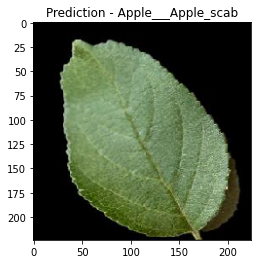

In [ ]:
predict_image('Apple___healthy/11749aa9-4b07-4cd8-8605-356de6d4cc68___RS_HL 7684_final_masked.jpg',model)


1/1 [==============================] - 0s 23ms/step


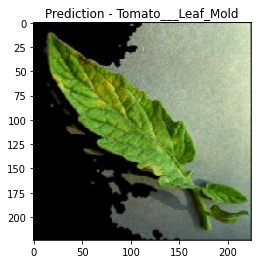

In [ ]:
predict_image('Tomato___Leaf_Mold/10671d95-f882-4e19-994f-b35917d2c763___Crnl_L.Mold 9098_final_masked.jpg',model)

1/1 [==============================] - 0s 23ms/step


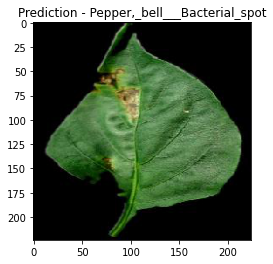

In [ ]:
predict_image('Pepper,_bell___Bacterial_spot/301b41f3-647f-4bd2-9adb-ef98c8b8c238___JR_B.Spot 3399_final_masked.jpg',model)

1/1 [==============================] - 0s 24ms/step


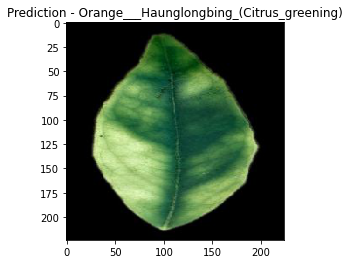

In [ ]:
predict_image('Orange___Haunglongbing_(Citrus_greening)/229e7908-5859-41db-8185-5cd34e153d57___CREC_HLB 4419_final_masked.jpg',model)

In [ ]:
def labels_confusion_matrix(test_folder):
    
    folder_path=val_data_gen
    
    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i
    
    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):
        
        true=os.path.join(folder_path,i)
        true=true.split('/')[-1]
        true=mapping[true]
        
        for j in os.listdir(os.path.join(folder_path,i)):

            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(224,224))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0) 
            img_processed /= 255.
            prediction = model.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)
            
    return (real,predicted)

def print_confusion_matrix(real,predicted):
    total_output_labels = 38
    cmap="OrRd"
    cm_plot_labels = [i for i in range(38)]
    
  
    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.2) # for label size
    plt.figure(figsize = (10,10))
    s=sns.heatmap(df_cm,fmt="d", annot=True,cmap=cmap) # font size

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

In [ ]:
y_true,y_pred=labels_confusion_matrix(val_data_gen)
print(classification_report(y_true, y_pred))

1/1 [==============================] - 0s 29ms/step
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        62
           1       0.97      0.94      0.96        71
           2       0.97      0.89      0.93        36
           3       0.83      0.89      0.86        99
           4       0.92      0.96      0.94        83
           5       0.98      0.96      0.97       117
           6       0.97      0.98      0.97        89
           7       0.79      0.80      0.80        66
           8       0.99      0.95      0.97        96
           9       0.85      0.88      0.86       105
          10       1.00      1.00      1.00        77
          11       0.95      0.93      0.94       105
          12       0.90      0.94      0.92        80
          13       0.98      0.97      0.97        87
          14       1.00      0.98      0.99        51
          15       0.99      0.99      0.99       234
          16       0.96      

1/1 [==============================] - 0s 36ms/step


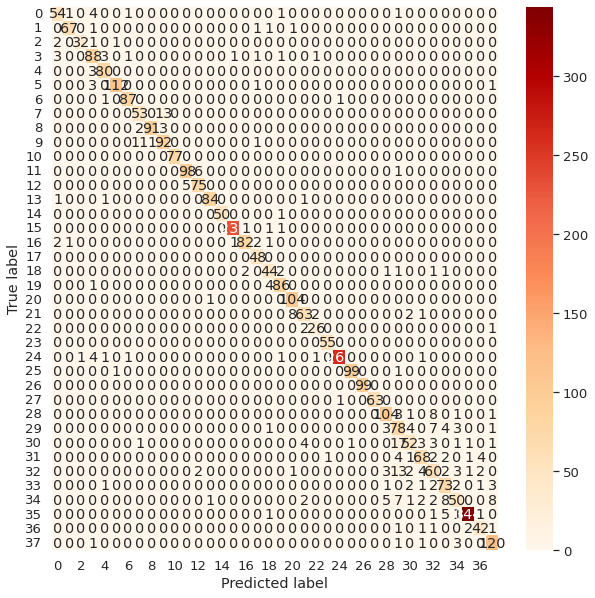

In [ ]:
y_true,y_pred=labels_confusion_matrix(val_data_gen)
print_confusion_matrix(y_true,y_pred)